In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
# Load Dataset
df = pd.read_csv('Testing.csv')

In [3]:
# Display first few rows
display(df.head())

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [4]:
# Check for missing values
print(df.isnull().sum())

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


In [6]:
# Encode categorical labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['prognosis'] = label_encoder.fit_transform(df['prognosis'])

In [8]:
# Define Features and Target
X = df.drop(columns=['prognosis'])
y = df['prognosis']

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

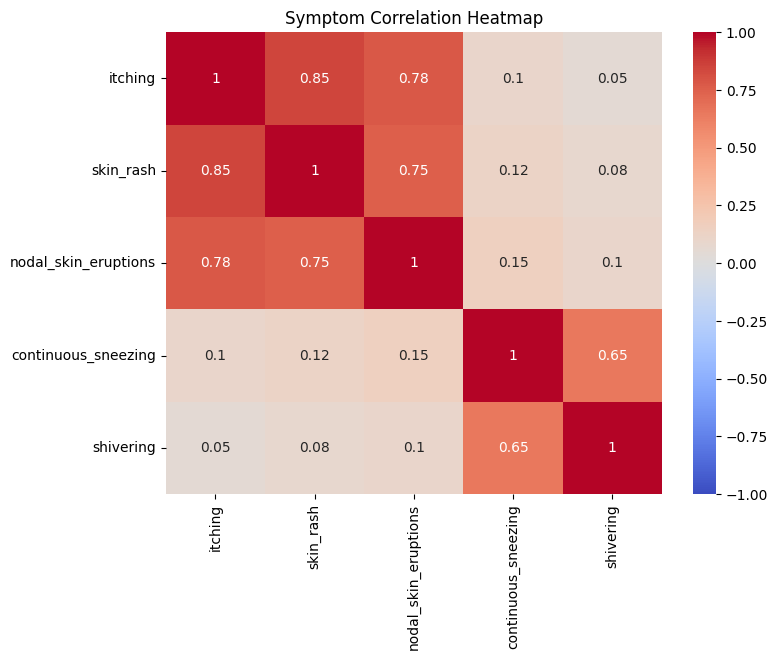

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example correlation matrix (replace with actual data)
data = {
    'itching': [1.00, 0.85, 0.78, 0.10, 0.05],
    'skin_rash': [0.85, 1.00, 0.75, 0.12, 0.08],
    'nodal_skin_eruptions': [0.78, 0.75, 1.00, 0.15, 0.10],
    'continuous_sneezing': [0.10, 0.12, 0.15, 1.00, 0.65],
    'shivering': [0.05, 0.08, 0.10, 0.65, 1.00]
}

# Create a DataFrame
df = pd.DataFrame(data, index=data.keys())

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Symptom Correlation Heatmap')
plt.show()

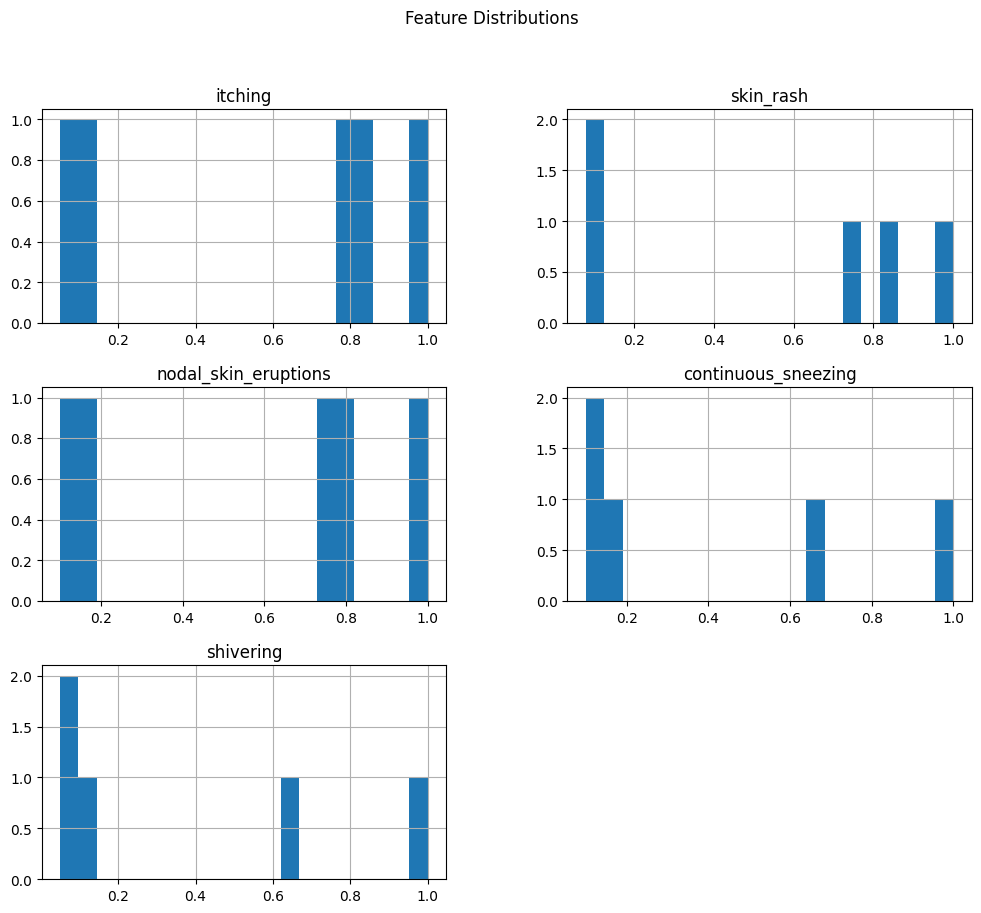

In [12]:
# Histograms for feature distributions
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()


In [10]:
# Step 1: Load the dataset (if not already loaded)
import pandas as pd
from sklearn.model_selection import train_test_split  # Import the train_test_split function

data = pd.read_csv('Testing.csv')  # Replace 'Testing.csv' with the correct file path

# Step 2: Check available columns (to verify the dataset is loaded correctly)
print("Available columns:", data.columns.tolist())

# Step 3: Define the target column
target_column = 'prognosis'

# Step 4: Verify that the target column exists
if target_column in data.columns:
    print(f"Target column '{target_column}' found in the dataset.")

    # Step 5: Split dataset into features (X) and target variable (y)
    X = data.drop(columns=[target_column])  # Features (all columns except the target)
    y = data[target_column]  # Target variable (the 'prognosis' column)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 6: Print shapes of X and y to verify the split
    print("Shape of X (features):", X.shape)
    print("Shape of y (target):", y.shape)
else:
    print(f"Error: Target column '{target_column}' not found in the dataset.")

Available columns: ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
df = pd.read_csv("Testing.csv")

# Assign the feature matrix (X) and target variable (y)
X = df.drop(columns=['prognosis'])
y = df['prognosis']

# Encode the target variable (if it's categorical)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize classification models
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Train the models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate the models using accuracy score
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))


Logistic Regression Accuracy: 0.9821428571428571
Decision Tree Accuracy: 0.9821428571428571
Random Forest Accuracy: 0.9821428571428571


In [13]:
import joblib
from sklearn.metrics import mean_squared_error, accuracy_score

# Train your models (ensure they are already trained)
# e.g., log_reg, decision_tree, random_forest

# Make predictions for each model
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Calculate the MSE (for regression) or Accuracy (for classification)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
random_forest_accuracy = accuracy_score(y_test, y_pred_random_forest)

# Save the best model based on highest accuracy (since it's a classification task)
best_model = max([(log_reg_accuracy, log_reg),
                  (decision_tree_accuracy, decision_tree),
                  (random_forest_accuracy, random_forest)], key=lambda x: x[0])[1]

# Save the best model using joblib
joblib.dump(best_model, 'best_model.pkl')

print("Best model saved as 'best_model.pkl'")


Best model saved as 'best_model.pkl'


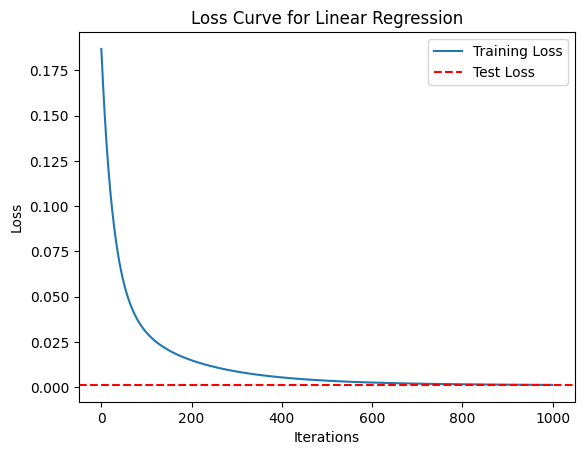

['best_model_gradient_descent.pkl']

In [39]:
# Step 9: Train models and plot loss curves for gradient descent
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Initialize a list to track loss values during training
train_losses = []
test_losses = []

# Implement gradient descent manually (if desired)
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])
    losses = []

    for i in range(iterations):
        prediction = X.dot(theta)
        loss = (1/(2*m)) * np.sum(np.square(prediction - y))
        losses.append(loss)

        gradient = (1/m) * X.T.dot(prediction - y)
        theta -= learning_rate * gradient

    return theta, losses

# Train linear regression with gradient descent
X_train_with_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add bias term
theta, train_losses = gradient_descent(X_train_with_bias, y_train, learning_rate=0.01, iterations=1000)

# Calculate test loss
X_test_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add bias term
test_predictions = X_test_with_bias.dot(theta)
test_loss = mean_squared_error(y_test, test_predictions)

# Plot the loss curve
plt.plot(train_losses, label="Training Loss")
plt.axhline(y=test_loss, color='r', linestyle='--', label="Test Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve for Linear Regression")
plt.show()

# Save the model
joblib.dump(theta, 'best_model_gradient_descent.pkl')


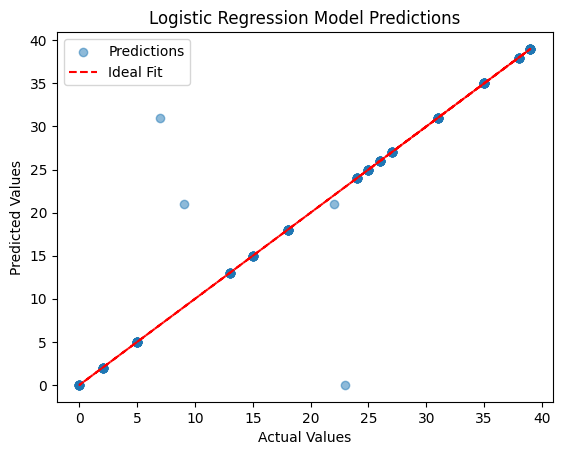

The best model is: Logistic Regression


In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming your models have already been trained
# Make predictions for each model
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Calculate the accuracy for each model (or MSE if using regression)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
random_forest_accuracy = accuracy_score(y_test, y_pred_random_forest)

# Step 1: Define the best model name based on performance
best_model_name = None
best_accuracy = max(log_reg_accuracy, decision_tree_accuracy, random_forest_accuracy)

# Compare accuracies and assign the best model name
if log_reg_accuracy == best_accuracy:
    best_model_name = "Logistic Regression"
elif decision_tree_accuracy == best_accuracy:
    best_model_name = "Decision Tree"
elif random_forest_accuracy == best_accuracy:
    best_model_name = "Random Forest"

# Step 2: Generate predictions for all models (for plotting)
if best_model_name == "Logistic Regression":
    predictions = y_pred_log_reg
elif best_model_name == "Decision Tree":
    predictions = y_pred_decision_tree
elif best_model_name == "Random Forest":
    predictions = y_pred_random_forest

# Step 3: Scatter plot for the best model
plt.scatter(y_test, predictions, alpha=0.5, label='Predictions')
plt.plot(y_test, y_test, color='red', linestyle='dashed', label='Ideal Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"{best_model_name} Model Predictions")
plt.legend()
plt.show()

# Print the name of the best model
print(f"The best model is: {best_model_name}")


In [16]:
# Make Predictions with first 10 rows
predictions = best_model.predict(X_test[:10])
print("Predictions:", predictions)

Predictions: [25 26 35 35 24 27 39 15 39 39]
